# Практическая работа 3
**Павел Исаенко БПИ20-02**
## Цель
+ Поиск и устранение пропусков в данных
+ Знакомство с методами восстановления пропущенных значений
## Ход работы

### 1. Загрузил [набор данных](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv). Этот набор содержит информацию о продаже домов в городе Эймс, штат Айова, США. Набор данных содержит как числовые, так и номинальные признаки, а также пропущенные значения.

In [1]:
# !pip install --upgrade pip
# !pip install pandas
# !pip install scipy
# !pip install seaborn
# !pip install numpy
# !pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# import math
# import seaborn as sns
# from scipy.special import erfc
# from collections import Counter
# import scipy.stats as st

In [3]:
sumb = pd.read_csv("DS/sample_submission.csv")
test = pd.read_csv("DS/test.csv")

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [4]:
sumb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


*Набор содержит и числовые, и номинальные данные*

In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test.isna().sum()[test.isna().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

*Пропущенные данные*

### 2. Выполнил преобработку данных

+ Выполнил слияние основной части таблицы с частью, содержащей информацию о ценах на надвижимость. *(с помощью merge)*

In [7]:
df = sumb.merge(test, how="inner", left_on="Id", right_on="Id")
df

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,169277.052498,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,187758.393989,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,183583.683570,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,179317.477511,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,150730.079977,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,167081.220949,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,164788.778231,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,219222.423400,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,184924.279659,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


*Теперь объединенная таблица содержит информацию о ценах*

* Числовые переменные пометил меткой float64.

In [8]:
df.dtypes[df.dtypes == np.int64]

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
dtype: object

*Получил список столбцов типа int64*

In [9]:
int_cols = df.select_dtypes(include=['int64']).columns
df[int_cols] = df[int_cols].astype(dtype='float64')

*Пометил*

In [10]:
df.dtypes[df.dtypes == np.float64]

Id               float64
SalePrice        float64
MSSubClass       float64
LotFrontage      float64
LotArea          float64
OverallQual      float64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF         float64
2ndFlrSF         float64
LowQualFinSF     float64
GrLivArea        float64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath         float64
HalfBath         float64
BedroomAbvGr     float64
KitchenAbvGr     float64
TotRmsAbvGrd     float64
Fireplaces       float64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF       float64
OpenPorchSF      float64
EnclosedPorch    float64
3SsnPorch        float64
ScreenPorch      float64
PoolArea         float64
MiscVal          float64
MoSold           float64
YrSold           float64
dtype: object

*Проверил*

* Категориальные переменные пометить меткой category.

In [11]:
obj_cols = df.select_dtypes(include=['object']).columns
df[obj_cols] = df[obj_cols].astype(dtype='category')

* Вывел **head** и **tail** набора данных

In [12]:
df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,169277.052498,20.0,RH,80.0,11622.0,Pave,NaN,Reg,Lvl,...,120.0,0.0,NaN,MnPrv,NaN,0.0,6.0,2010.0,WD,Normal
1,1462.0,187758.393989,20.0,RL,81.0,14267.0,Pave,NaN,IR1,Lvl,...,0.0,0.0,NaN,NaN,Gar2,12500.0,6.0,2010.0,WD,Normal
2,1463.0,183583.683570,60.0,RL,74.0,13830.0,Pave,NaN,IR1,Lvl,...,0.0,0.0,NaN,MnPrv,NaN,0.0,3.0,2010.0,WD,Normal
3,1464.0,179317.477511,60.0,RL,78.0,9978.0,Pave,NaN,IR1,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2010.0,WD,Normal
4,1465.0,150730.079977,120.0,RL,43.0,5005.0,Pave,NaN,IR1,HLS,...,144.0,0.0,NaN,NaN,NaN,0.0,1.0,2010.0,WD,Normal


In [13]:
df.tail()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915.0,167081.220949,160.0,RM,21.0,1936.0,Pave,NaN,Reg,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2006.0,WD,Normal
1455,2916.0,164788.778231,160.0,RM,21.0,1894.0,Pave,NaN,Reg,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,4.0,2006.0,WD,Abnorml
1456,2917.0,219222.423400,20.0,RL,160.0,20000.0,Pave,NaN,Reg,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2006.0,WD,Abnorml
1457,2918.0,184924.279659,85.0,RL,62.0,10441.0,Pave,NaN,Reg,Lvl,...,0.0,0.0,NaN,MnPrv,Shed,700.0,7.0,2006.0,WD,Normal
1458,2919.0,187741.866657,60.0,RL,74.0,9627.0,Pave,NaN,Reg,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,11.0,2006.0,WD,Normal


* Вывел **df.info()**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   float64 
 1   SalePrice      1459 non-null   float64 
 2   MSSubClass     1459 non-null   float64 
 3   MSZoning       1455 non-null   category
 4   LotFrontage    1232 non-null   float64 
 5   LotArea        1459 non-null   float64 
 6   Street         1459 non-null   category
 7   Alley          107 non-null    category
 8   LotShape       1459 non-null   category
 9   LandContour    1459 non-null   category
 10  Utilities      1457 non-null   category
 11  LotConfig      1459 non-null   category
 12  LandSlope      1459 non-null   category
 13  Neighborhood   1459 non-null   category
 14  Condition1     1459 non-null   category
 15  Condition2     1459 non-null   category
 16  BldgType       1459 non-null   category
 17  HouseStyle     1459 non-null   ca

* Вывел статистические показатели **.describe()**

In [15]:
df.describe()

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,179183.918243,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,16518.303051,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,135751.318893,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,168703.011202,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,179208.665698,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,186789.409363,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,281643.976117,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### 3. Выполнил поиск признаков, содержащих NaN, и проанализировал их:

* Вывел признаки, содеражащие пропуски

In [16]:
df.isna().sum()[df.isna().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

* Вычислил основные статистические показатели признака

In [17]:
# for col in df.isna().sum()[df.isna().sum() > 0].index:
#         print(df[col].describe(include = "all"))
#         print('\n')
        
df[df.isna().sum()[df.isna().sum() > 0].index].describe()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,1232.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1457.000000,1457.000000,1381.000000,1458.000000,1458.000000
mean,68.580357,100.709141,439.203704,52.619342,554.294925,1046.117970,0.434454,0.065202,1977.721217,1.766118,472.768861
std,22.376841,177.625900,455.268042,176.753926,437.260486,442.898624,0.530648,0.252468,26.431175,0.775945,217.048611
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,58.000000,0.000000,0.000000,0.000000,219.250000,784.000000,0.000000,0.000000,1959.000000,1.000000,318.000000
50%,67.000000,0.000000,350.500000,0.000000,460.000000,988.000000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,80.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,200.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


### 4. Применил методы восстановления значения признака:

* Применил методы замены пропусков для числовых значений: среднее, медиана, на основе корреляции, на основе расстояния.

Объяснить результат (какой из методов более подходит для восстановление значения признака)

*Буду восстанавливать пропуски в значениях **LotFrontage***

1. **Числовые значения**

1.1 Средние значения

In [18]:
#Создал копию датасета
df_c = df.copy()

In [19]:
df_c.LotFrontage.mean()

68.58035714285714

In [20]:
#Метод средних значений
print("LotFrontage: ср. значения", df_c.LotFrontage.mean())
print("_____________________")
print("Индексы NuN-значений") 
print(df_c.LotFrontage.isna()[ df_c.LotFrontage.isna() == True])
df_c.LotFrontage = df_c.LotFrontage.fillna(df_c.LotFrontage.mean())

LotFrontage: ср. значения 68.58035714285714
_____________________
Индексы NuN-значений
6       True
40      True
41      True
45      True
47      True
        ... 
1387    True
1390    True
1440    True
1441    True
1448    True
Name: LotFrontage, Length: 227, dtype: bool


In [21]:
print(df_c.LotFrontage.isna()[ df_c.LotFrontage.isna() == True])

Series([], Name: LotFrontage, dtype: bool)


In [22]:
df_c.isna().sum()

Id               0
SalePrice        0
MSSubClass       0
MSZoning         4
LotFrontage      0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 81, dtype: int64

1.2 Медиана

In [23]:
#Обновил копию
df_c = df.copy()

In [24]:
df_c.LotFrontage.median()

67.0

In [25]:
#Метод средних значений
print("LotFrontage: ср. значения", df_c.LotFrontage.mean())
print("____________________")
print("Индексы NuN-значений") 
print(df_c.LotFrontage.isna()[ df_c.LotFrontage.isna() == True])
df_c.LotFrontage = df_c.LotFrontage.fillna(df_c.LotFrontage.mean())

LotFrontage: ср. значения 68.58035714285714
____________________
Индексы NuN-значений
6       True
40      True
41      True
45      True
47      True
        ... 
1387    True
1390    True
1440    True
1441    True
1448    True
Name: LotFrontage, Length: 227, dtype: bool


In [26]:
print(df_c.LotFrontage.isna()[ df_c.LotFrontage.isna() == True])

Series([], Name: LotFrontage, dtype: bool)


In [27]:
df_c.isna().sum()

Id               0
SalePrice        0
MSSubClass       0
MSZoning         4
LotFrontage      0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 81, dtype: int64

1.3 Корреляция

In [28]:
#Обновил копию
df_c = df.copy()

In [29]:
import seaborn as sns

In [30]:
df_c[df_c.select_dtypes(include=['float64']).columns].all()

Id                True
SalePrice         True
MSSubClass        True
LotFrontage       True
LotArea           True
OverallQual       True
OverallCond       True
YearBuilt         True
YearRemodAdd      True
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF          True
2ndFlrSF         False
LowQualFinSF     False
GrLivArea         True
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd      True
Fireplaces       False
GarageYrBlt       True
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold            True
YrSold            True
dtype: bool

In [31]:
df_c[df_c.select_dtypes(include=['float64']).columns].corr()

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.126165,0.004993,0.009930,0.051492,-0.064887,0.009553,-0.058647,-0.079437,-0.021424,...,-0.050941,0.015664,-0.002045,0.020999,-0.025896,0.025566,0.049535,-0.005744,0.143358,-0.974884
SalePrice,0.126165,1.000000,-0.205917,0.501833,0.715795,0.093643,-0.083753,0.008187,0.018889,0.150002,...,0.250879,0.109188,0.151314,0.094659,-0.055704,0.041524,0.071271,0.081200,0.239906,-0.134199
MSSubClass,0.004993,-0.205917,1.000000,-0.450505,-0.359537,0.034690,-0.071768,0.040848,0.046319,-0.012186,...,-0.108000,-0.022539,-0.025421,-0.029051,-0.029709,-0.071978,-0.017790,-0.045835,0.011366,-0.008392
LotFrontage,0.009930,0.501833,-0.450505,1.000000,0.644608,0.182870,-0.092312,0.122356,0.092603,0.251533,...,0.375581,0.157426,0.179795,0.013340,-0.037487,0.113444,0.134232,0.068161,0.008810,-0.025263
LotArea,0.051492,0.715795,-0.359537,0.644608,1.000000,0.107989,-0.103402,0.048314,0.036907,0.188691,...,0.315841,0.158483,0.164815,0.099850,-0.001846,0.088712,0.140494,0.139071,0.005152,-0.051144
OverallQual,-0.064887,0.093643,0.034690,0.182870,0.107989,1.000000,-0.095874,0.621910,0.591267,0.453991,...,0.568161,0.270790,0.288367,-0.161339,0.002803,0.022334,-0.012330,0.033784,-0.008764,-0.012291
OverallCond,0.009553,-0.083753,-0.071768,-0.092312,-0.103402,-0.095874,1.000000,-0.361027,0.021668,-0.144261,...,-0.156769,0.043058,-0.103783,0.072178,0.071285,0.033146,-0.037191,0.007236,-0.009767,0.015649
YearBuilt,-0.058647,0.008187,0.040848,0.122356,0.048314,0.621910,-0.361027,1.000000,0.631696,0.312404,...,0.482497,0.233889,0.208040,-0.363012,-0.005442,-0.031984,-0.001060,0.007325,0.015599,-0.011006
YearRemodAdd,-0.079437,0.018889,0.046319,0.092603,0.036907,0.591267,0.021668,0.631696,1.000000,0.213937,...,0.382034,0.230724,0.258049,-0.243582,0.025823,-0.053761,-0.034862,0.003011,0.011771,0.029715
MasVnrArea,-0.021424,0.150002,-0.012186,0.251533,0.188691,0.453991,-0.144261,0.312404,0.213937,1.000000,...,0.375182,0.172721,0.163666,-0.112814,0.005772,0.069339,-0.005395,0.105723,0.005118,-0.029556


<Axes: >

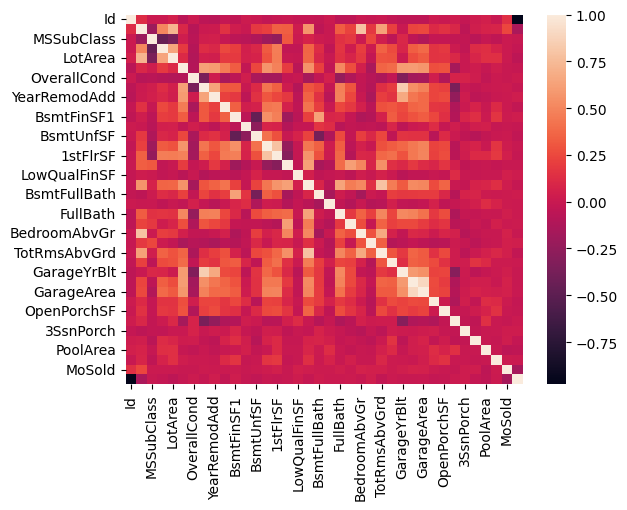

In [32]:
sns.heatmap(df_c[df_c.select_dtypes(include=['float64']).columns].corr())

*Для удобства восприятия большого количества значений была построена тепловая карта*

Наибольший КК у столбца **LotFrontage** *(длина улицы, связанной с земельным участком)* со столбцом **LotArea** *(площадь участка)*

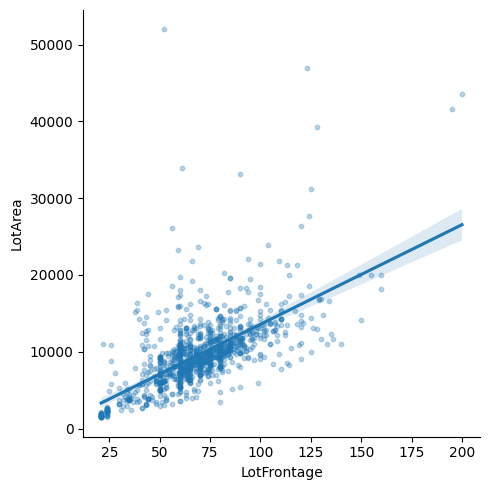

In [33]:
sns.lmplot(data=df, x="LotFrontage", y="LotArea", scatter_kws={"s": 10, "alpha":0.3})

*Линейная регрессия*

Так как в датасете присутствуют столбцы с большим количеством пропусков - я удалил эти столбцы.

In [34]:
LotFrontage_prepd = df_c.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
LotFrontage_prepd.isna().sum()[LotFrontage_prepd.isna().sum() > 0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [35]:
LotArea_dropna_mean = df_c.LotArea.dropna().mean()
LotFrontage_dropna_mean = df_c.LotFrontage.dropna().mean()
LotArea_corr = df_c[df_c.select_dtypes(include=['float64']).columns].corr()["LotArea"].LotFrontage

print("Ср. с удаленными Null:\t" + str(LotFrontage_dropna_mean))
print("КК LotFrontage~LotArea:\t" + str(LotArea_corr))
print("\nИндекс\tВосстановленные значения\n" +
    "--------------------------------")
for i in df_c.LotFrontage.isna()[df_c.LotFrontage.isna() == True].index:
    numtr = LotArea_corr * (df_c.LotArea[i] - LotArea_dropna_mean)
    dentr = abs(LotArea_dropna_mean)
    df_c.loc[i, 'LotFrontage'] = LotFrontage_dropna_mean + numtr/dentr
    print(str(i) + "\t" + str(df_c.LotFrontage[i]))

Ср. с удаленными Null:	68.58035714285714
КК LotFrontage~LotArea:	0.6446084977757518

Индекс	Восстановленные значения
--------------------------------
6	68.45961985729446
40	68.13137974939153
41	68.09350084093953
45	68.62216435872799
47	69.17236042759485
52	68.63161767383558
59	68.4642152188051
75	68.47662269488383
82	68.44734367725889
98	68.35911273625457
103	68.42311955729565
105	69.25277925403108
107	69.05714814972093
113	68.67100648678394
119	68.5487042225793
124	68.22689762079128
132	68.4537115353522
146	68.77341740044965
152	68.71531890135083
167	68.70987011555964
174	68.51364817905527
177	68.80558493102413
179	68.74899633642167
182	68.42810880693577
183	68.49178738786894
184	68.55106755135621
187	68.44977265405737
188	68.49441330873216
199	68.63883895620945
229	68.52428315855133
230	68.47235557348108
231	68.7820172912767
235	68.97928959612636
238	68.64146487707268
240	68.70330531340159
268	68.61021641880032
271	68.49369118049478
272	68.53176703301152
273	68.54732561412611
274	68.

1.4 Расстояние (Манхэттен)

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_c = df

In [37]:
scaler = StandardScaler()
normArea = scaler.fit_transform(df_c.LotArea.to_numpy().reshape(-1, 1))
normPrice = scaler.fit_transform(df_c.SalePrice.to_numpy().reshape(-1, 1))
normFrontage = scaler.fit_transform(df_c.LotFrontage.to_numpy().reshape(-1, 1))

for i in df_c.LotArea[df_c.LotFrontage > 0].index:
    print(str(df_c.LotArea[i]) + "\t\t" + str(normArea[i]))
# print(str(df_c.LotArea) + "\t\t" + str(norm))

11622.0		[0.36392912]
14267.0		[0.89786065]
13830.0		[0.80964587]
9978.0		[0.03206394]
5005.0		[-0.97180807]
10000.0		[0.03650495]
8402.0		[-0.28607447]
10176.0		[0.0720331]
8400.0		[-0.2864782]
5858.0		[-0.79961768]
1680.0		[-1.64300743]
1680.0		[-1.64300743]
2280.0		[-1.52188875]
2280.0		[-1.52188875]
12858.0		[0.61343361]
12883.0		[0.61848022]
11520.0		[0.34333895]
14122.0		[0.8685903]
14300.0		[0.90452217]
13650.0		[0.77331027]
7132.0		[-0.54244234]
18494.0		[1.75114176]
3203.0		[-1.33556784]
13300.0		[0.7026577]
8577.0		[-0.25074819]
17433.0		[1.53696356]
8987.0		[-0.16798375]
9215.0		[-0.12195865]
10440.0		[0.12532532]
11920.0		[0.42408474]
9800.0		[-0.00386794]
15410.0		[1.12859174]
13143.0		[0.67096498]
11134.0		[0.26541926]
4835.0		[-1.00612503]
3515.0		[-1.27258613]
3215.0		[-1.33314547]
2544.0		[-1.46859653]
2544.0		[-1.46859653]
12853.0		[0.61242429]
7379.0		[-0.49258182]
8000.0		[-0.36722398]
10791.0		[0.19617975]
9600.0		[-0.04424083]
9600.0		[-0.04424083]
9900.0		[0.0163

In [38]:
import math

def calc_metric(sample1: np.array, sample2: np.array) -> float:
    return np.sum(np.abs(sample1 - sample2))

# calc_metric(df_c.LotFrontage, df_c.LotArea)
# for i in df_c.LotFrontage.isna()[ df_c.LotFrontage.isna() == True]:
#     i = calc_metric(df_c.LotFrontage)

In [39]:
df_c.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461.0,169277.052498,20.0,RH,80.0,11622.0,Pave,NaN,Reg,Lvl,...,120.0,0.0,NaN,MnPrv,NaN,0.0,6.0,2010.0,WD,Normal
1,1462.0,187758.393989,20.0,RL,81.0,14267.0,Pave,NaN,IR1,Lvl,...,0.0,0.0,NaN,NaN,Gar2,12500.0,6.0,2010.0,WD,Normal
2,1463.0,183583.683570,60.0,RL,74.0,13830.0,Pave,NaN,IR1,Lvl,...,0.0,0.0,NaN,MnPrv,NaN,0.0,3.0,2010.0,WD,Normal
3,1464.0,179317.477511,60.0,RL,78.0,9978.0,Pave,NaN,IR1,Lvl,...,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2010.0,WD,Normal
4,1465.0,150730.079977,120.0,RL,43.0,5005.0,Pave,NaN,IR1,HLS,...,144.0,0.0,NaN,NaN,NaN,0.0,1.0,2010.0,WD,Normal


In [40]:
metrics_result = []
result = []

# Массив коэффицентов расстояний объектов
df_c = df
df_n = df_c.LotFrontage.isna()[df_c.LotFrontage.isna()].index
df_t = df_c.copy()
df_t.LotArea = normArea
df_t.SalePrice = normPrice

df_tt = df_t[df_t.columns[[1, 5]]]

x = df_tt.loc[df_t.LotFrontage.isna()].select_dtypes(include=['float64']).to_numpy()

for i in range(len(df_n)):
    for cols, value in df_tt[~df.LotFrontage.isnull()].iterrows():
        x2 = value.to_numpy()
        metric_value = calc_metric(x[i], x2)
        metrics_result.append(metric_value)
        

    values = df[~df.LotFrontage.isnull()].LotFrontage.to_numpy()
    metrics_result = np.array(metrics_result)

    # normal = 1 / np.sum(1 / metrics_result) # коэфициент нормализации, нужен т.к. если расстояние близкое - то значение большое, иначе малое
    if np.any(metrics_result == 0):
        normal = 0
    else:
        normal = 1 / np.sum(1 / metrics_result)
    
    score = np.sum(np.divide(values, metrics_result)) * normal # вычисляем результат
    # test_m = np.array(list(map(lambda x: x if x != 0 else 1, metrics_result)))
    # print(metrics_result)
    # print(test_m)
    # print(value)
    # score = np.sum(np.nan_to_num(np.divide(values, metrics_result))) * normal
    print('восстановлено:', score)
    
    metrics_result = []
    result.append(score)

    
for i in range(len(df_n)):
    df_c.LotFrontage.at[df_n[i]] = result[i]

df_c = df_c.dropna(subset=['LotFrontage'])

df_c.isna().sum()

восстановлено: 66.8137467258337
восстановлено: 54.40820962160459
восстановлено: 51.89153719066854
восстановлено: 72.36692837445378
восстановлено: 75.5261469540016
восстановлено: 72.99927013498095
восстановлено: 66.77343843945225
восстановлено: 67.30805720512427
восстановлено: 67.18562266814894
восстановлено: 66.94080098731796
восстановлено: 66.1922889928113
восстановлено: 71.1418185613332
восстановлено: 75.80396717391835
восстановлено: 73.64353669528938
восстановлено: 70.08123768401508
восстановлено: 60.05243469277823
восстановлено: 64.08671916667602
восстановлено: 74.66016665539526
восстановлено: 74.9190251952744
восстановлено: 75.34540152427925
восстановлено: 69.45607326969457
восстановлено: 76.92666577598358
восстановлено: 76.01013465160575
восстановлено: 66.20549614406153
восстановлено: 68.8854482455029
восстановлено: 71.31735356803507
восстановлено: 64.13915879515177
восстановлено: 68.99908452415823
восстановлено: 73.82704186928389
восстановлено: 69.59348648122568
восстановлено: 6

/var/folders/hh/7sz9tzxj73x_6hr6mr07lmvc0000gn/T/ipykernel_5734/904151375.py:31: RuntimeWarning: divide by zero encountered in divide
  score = np.sum(np.divide(values, metrics_result)) * normal # вычисляем результат
/var/folders/hh/7sz9tzxj73x_6hr6mr07lmvc0000gn/T/ipykernel_5734/904151375.py:31: RuntimeWarning: invalid value encountered in scalar multiply
  score = np.sum(np.divide(values, metrics_result)) * normal # вычисляем результат


восстановлено: 67.40788773162363
восстановлено: 72.46351529555606
восстановлено: 73.73680088741432
восстановлено: 75.66999393721967
восстановлено: 56.60182283194714
восстановлено: 74.77543983834485
восстановлено: 56.808735673585595
восстановлено: 75.93606520373915
восстановлено: 74.72306682425332
восстановлено: 68.23920101444797
восстановлено: 68.66090753979668
восстановлено: 69.54355322441243
восстановлено: 73.86365293779825
восстановлено: 74.81968014810103
восстановлено: 74.12404175872528
восстановлено: 71.84932260630333
восстановлено: 73.98016739230884
восстановлено: 75.29379245756583
восстановлено: 67.1020675309121
восстановлено: 70.5477163632169
восстановлено: 63.63077637417127
восстановлено: 62.154877793249184
восстановлено: 73.81179610456552
восстановлено: 66.27881748901528
восстановлено: 68.03173278436083
восстановлено: 69.50033832053676
восстановлено: 73.2197759853985
восстановлено: 75.45416309270773
восстановлено: 73.63836249080389
восстановлено: 75.28281005470606
восстановле

Id               0
SalePrice        0
MSSubClass       0
MSZoning         4
LotFrontage      0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 81, dtype: int64

2. **Номинальные значения**

In [41]:
dff = df_c.copy()
# Для этого задания я выбрал столбец MSZoning с 4-мя пропусками

dff["MSZoning"] = dff["MSZoning"].fillna(dff["MSZoning"].mode().iloc[0])
dff["MSZoning"]

0       RH
1       RL
2       RL
3       RL
4       RL
        ..
1454    RM
1455    RM
1456    RL
1457    RL
1458    RL
Name: MSZoning, Length: 1458, dtype: category
Categories (5, object): ['C (all)', 'FV', 'RH', 'RL', 'RM']

### 5. Применил поиск выбросов в числовых признаках:

1.1 На основе простейшего метода из алгоритма 2

In [42]:
df_mean = df_c.LotArea.mean()
print("Средний LotFrontage: " , df_mean)

Средний LotFrontage:  9819.544581618657


In [43]:
df_medi = df_c.LotArea.median()
print("Медиана LotFrontage: " , df_medi)

Медиана LotFrontage:  9413.5


1.2 На основе методов без использования среднего и СКО (межквартильный размах (IQR))

In [44]:
# Определил пороговые значения для выбросов
q1 = df_c.LotArea.quantile(0.25)
q3 = df_c.LotArea.quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

# Поиск выбросов
outliers = df_c[(df_c.LotArea > upper) | (df_c.LotArea < lower)]

print("id\tvalue\n---------------")
print(outliers.LotArea)

id	value
---------------
22      18494.0
47      18837.0
105     20062.0
108     18600.0
137     19645.0
206     23303.0
394     19255.0
396     26400.0
455     21780.0
485     31220.0
487     47280.0
490     18559.0
561     19508.0
579     24572.0
689     20270.0
691     19550.0
728     47007.0
748     26073.0
762     23730.0
772     18265.0
785     17979.0
790     56600.0
799     18160.0
803     51974.0
804     41600.0
901     19522.0
916     17778.0
936     22002.0
964     21281.0
1033    22692.0
1034    17808.0
1043    23920.0
1053    20064.0
1089    39290.0
1107    25485.0
1108    21579.0
1110    17871.0
1112    20693.0
1113    18044.0
1130    19958.0
1139    43500.0
1147    33983.0
1150    27697.0
1157    39384.0
1168    18062.0
1173    18261.0
1291    21299.0
1293    22136.0
1304    18275.0
1336    33120.0
1343    21370.0
1355    20355.0
1361    19950.0
1362    19800.0
1390    21533.0
1420    21780.0
1436    23580.0
1440    50102.0
1444    31250.0
1456    20000.0
Name: LotArea, 

1.4 На основе критерия Шовене

In [45]:
from scipy.special import erfc

arr = df_c.LotFrontage.to_numpy()
arr_mean = arr.mean()
arr_std = arr.std()

def chauvenet(y: np.array, mean=None, stdv=None) -> np.array:
    # based on https://github.com/msproteomicstools/msproteomicstools/blob/master/msproteomicstoolslib/math/chauvenet.py
    '''
        Returns: np.array[bool]. if false, then outlier
    '''
    if mean is None:
        mean = y.mean()    # Mean of incoming array y
    if stdv is None:
        stdv = y.std()      # Its standard deviation

    abs_deviation = np.abs(y - mean) / stdv
    d = erfc(abs_deviation)
    # Calculate the maximum absolute deviation that is still acceptable according to Chauvenet's criterion
    threshold = 1 / (2 * y.size - 1)

    # Determine which data points are outliers
    is_outlier = d > threshold

    # Return the indices of the outliers
    return is_outlier


def iterate(sample: np.array, repeat: bool = True) -> np.array:
    test_result = chauvenet(sample, arr_mean, arr_std)
    repeat = np.any(test_result == False)
    
    print('sample: ', sample)
    print('test_result: ', test_result)
    print('-----')
    
    if repeat:
        return iterate(sample[test_result], repeat)
    
    return sample
    
print(arr == iterate(sample = arr))
print(arr.min())

sample:  [ 80.  81.  74. ... 160.  62.  74.]
test_result:  [ True  True  True ... False  True  True]
-----
sample:  [80. 81. 74. ... 21. 62. 74.]
test_result:  [ True  True  True ...  True  True  True]
-----
False
21.0


/var/folders/hh/7sz9tzxj73x_6hr6mr07lmvc0000gn/T/ipykernel_5734/1955093267.py:42: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(arr == iterate(sample = arr))


2. Провести поиск аномалий числовых переменных нескольких признаков (минимум 3)
    
    
    2.1 Описать и точки, которые похожи на аномалии (по возможности, попробовать найти такими точками, на основе расстояния или кластеризации). 

<Axes: xlabel='LotFrontage', ylabel='LotArea'>

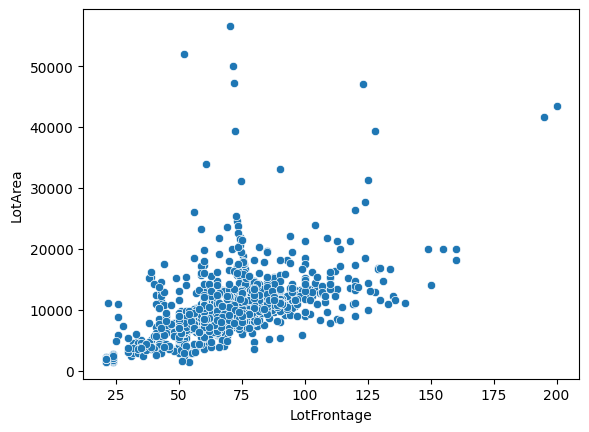

In [46]:
sns.scatterplot(data=df, x="LotFrontage", y="LotArea")

dots labels:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 7, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<Axes: xlabel='LotFrontage', ylabel='LotArea'>

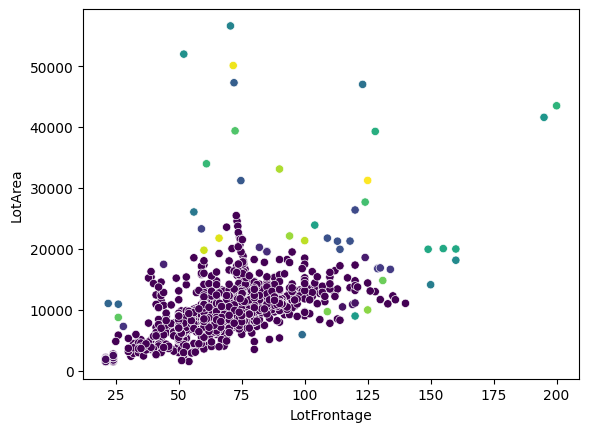

In [47]:
from sklearn.cluster import DBSCAN

def to_pairs(arr1, arr2):
    return np.vstack((arr1, arr2)).T

def standard_scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Normalize the data
    X_norm = (X - mean) / std
    
    return X_norm

X = to_pairs(df_c.LotArea, df_c.LotFrontage)
X_norm = standard_scale(X)

# ВАЖНО! на обучение отдаем нормированные данные!
clustering = DBSCAN(eps=0.3, min_samples=1).fit(X_norm) # обучаем модель, сейчас EPS была выбрана случайным образом

x_labels = clustering.labels_ # получаем отношение точек к кластеру
print('dots labels: ', list(x_labels))
sns.scatterplot(data=df, x="LotFrontage", y="LotArea", c=x_labels)


In [48]:
from collections import Counter

labels_counter = Counter(x_labels)

*выбросами являются те точки, у которых расстояние до других точек слишком больше (мы это видим, по количеству точек в кластерах)*

In [49]:
labels_counter

Counter({0: 1349,
         1: 57,
         2: 3,
         3: 1,
         4: 1,
         5: 3,
         6: 1,
         7: 4,
         8: 1,
         9: 1,
         10: 4,
         11: 1,
         12: 1,
         13: 2,
         14: 1,
         15: 1,
         16: 1,
         17: 1,
         18: 1,
         19: 1,
         20: 1,
         21: 1,
         22: 1,
         23: 1,
         24: 3,
         25: 1,
         26: 1,
         27: 1,
         28: 1,
         29: 1,
         30: 1,
         31: 1,
         32: 1,
         33: 1,
         34: 1,
         35: 1,
         36: 1,
         37: 1,
         38: 1,
         39: 1,
         40: 1})

In [50]:
ind_filt = set({})

filter_dots = np.array([labels_counter[label] > 2 for label in x_labels])
for i in range(len(x_labels)):
    labelFor = x_labels[i]
    if labels_counter[labelFor] <= 2:
        ind_filt.add(i)

print(ind_filt)
print('Points to leave = False:', list(filter_dots))

for ind, val in enumerate(ind_filt):
    df_c = df_c.drop(index = ind)

X_filtered = X[filter_dots]

df_c.LotFrontage = X_filtered[:, 1]
df_c.LotArea = X_filtered[:, 0]

{1281, 1156, 779, 396, 1292, 1419, 1042, 660, 789, 1180, 798, 1439, 802, 803, 1443, 169, 1200, 820, 1335, 1342, 1088, 578, 206, 1361, 982, 728, 485, 487, 747, 108, 112, 1138, 1146, 1149, 1278}
Points to leave = False: [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,

<Axes: xlabel='LotFrontage', ylabel='LotArea'>

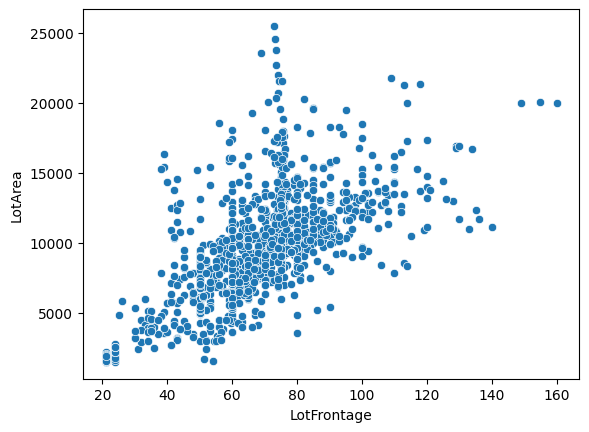

In [51]:
sns.scatterplot(x = df_c.LotFrontage, y = df_c.LotArea)

In [52]:
LotFr = StandardScaler().fit_transform(df_c.LotFrontage.to_numpy().reshape(-1, 1))
LotAr = StandardScaler().fit_transform(df_c.LotArea.to_numpy().reshape(-1, 1))

num_cols = df_c.select_dtypes(include=['int', 'float']).columns
normilize_df = df_c[num_cols].copy()
normilize_df.LotFrontage = LotFr
normilize_df.LotArea = LotAr
normilize_df

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
35,1496.0,152605.298564,120.0,0.606611,0.599524,7.0,5.0,2004.0,2005.0,0.0,...,506.0,168.0,50.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
36,1497.0,147797.702837,160.0,0.658273,1.319087,7.0,5.0,2004.0,2004.0,0.0,...,588.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,1.0,2010.0
37,1498.0,150521.968993,160.0,0.296641,1.200203,7.0,5.0,2004.0,2004.0,120.0,...,480.0,0.0,172.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0
38,1499.0,146991.630154,160.0,0.503288,0.152280,7.0,5.0,2004.0,2005.0,0.0,...,480.0,0.0,172.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
39,1500.0,150306.307815,160.0,-1.304873,-1.200606,6.0,5.0,2005.0,2005.0,216.0,...,480.0,0.0,166.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,167081.220949,160.0,-2.441431,-2.035516,4.0,7.0,1970.0,1970.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0
1455,2916.0,164788.778231,160.0,-2.441431,-2.046942,4.0,5.0,1970.0,1970.0,0.0,...,286.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
1456,2917.0,219222.423400,20.0,4.739550,2.878728,5.0,7.0,1960.0,1996.0,0.0,...,576.0,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0
1457,2918.0,184924.279659,85.0,-0.323300,0.278238,5.0,5.0,1992.0,1992.0,0.0,...,0.0,80.0,32.0,0.0,0.0,0.0,0.0,700.0,7.0,2006.0


In [54]:
import scipy.stats as st

print( st.shapiro(normilize_df.LotFrontage))
print( st.shapiro(normilize_df.LotArea))

ShapiroResult(statistic=0.9644139409065247, pvalue=3.335991286285534e-18)
ShapiroResult(statistic=0.9763637185096741, pvalue=1.5651474799364962e-14)
